# Excercise

I put the code below to load the penguins dataset. 
But I left out the **import** statements.  You need to put in the neccessary import statements. 

Make a plot of flipper length vs body mass

Find the parameters for a best fit line to this data  using sci-kit learn.

Fit a best fit line for flipper length vs body mass for each species separately and qualitatively compare the fits. Putting the best fit liens onto the graphs may help this. 

A scientist discovered a new penguin with body mass of 8,250 grams.  Using your models from above what would you predict it's flipper length to be? You should decide which of the above models you think is best for this task. 

Fit a best fit line for culmen depth vs body mass for each species separately and qualitatively compare the fits.  What aspects of the data do the model parameters (slope and intercept) capture?



In [1]:
#Write your own import statements here. 
import pandas as pd
import seaborn as sns
from sklearn import linear_model as lm
import matplotlib.pyplot as plt

penguins = pd.read_csv('../week_7/penguins_size.csv')
penguins.dropna(inplace=True)
penguins = penguins[ penguins['sex']!='.']
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [2]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

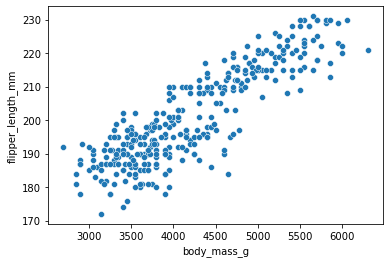

In [3]:
#Make a plot of flipper length vs body mass
sns.scatterplot(data=penguins,x='body_mass_g',y='flipper_length_mm')

In [4]:
#Initiliaze a linear regression model
model1 = lm.LinearRegression()
#Fit the data from the penguins dataset: NOTE THE [[]] double brackets for getting a frame 
model1.fit( penguins[['body_mass_g']], penguins[['flipper_length_mm']] )

LinearRegression()

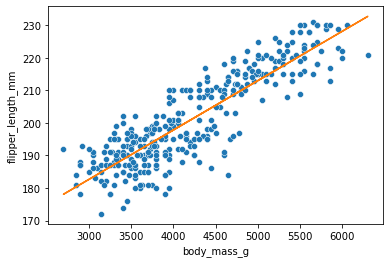

In [5]:
#Scatter the data again
sns.scatterplot(data=penguins,x='body_mass_g',y='flipper_length_mm')

#Use the x from above plot and the model fit above to make a prediction
x=penguins[['body_mass_g']]
yFit = model1.predict(x)

#use matplotlib to stick this plot ontop of the seaborn plot. 
plt.plot(x, yFit, color='tab:orange')


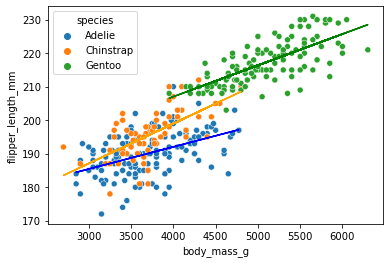

In [6]:
#Here is one way to do it. This way is sometimes simpler to understand
# But this way requires lots of code and only works for these 3 specific species
# if another species is added you need to add a lot of code.  
#  The next cell down does the same thing using for loops in a way that can be used for any
# number of species. 

#Initiliaze a linear regression model
modelGentoo = lm.LinearRegression()
modelAdelie = lm.LinearRegression()
modelChinstrap = lm.LinearRegression()

#Fit the data from the penguins dataset: NOTE THE [[]] double brackets for getting a frame 
gentooDF = penguins.query('species=="Gentoo"')
adelieDF = penguins.query('species=="Adelie"')
chinstrapDF = penguins.query('species=="Chinstrap"')

#Fit the models
modelGentoo.fit( gentooDF[['body_mass_g']], gentooDF[['flipper_length_mm']] )
modelAdelie.fit( adelieDF[['body_mass_g']], adelieDF[['flipper_length_mm']] )
modelChinstrap.fit( chinstrapDF[['body_mass_g']], chinstrapDF[['flipper_length_mm']] )


#Do the scatterplot
sns.scatterplot(data=penguins,x='body_mass_g',y='flipper_length_mm',hue='species')

#Create the linear predicted fits
x=gentooDF[['body_mass_g']]
yFit = modelGentoo.predict(x)
plt.plot(x, yFit, color='green')

x=adelieDF[['body_mass_g']]
yFit = modelAdelie.predict(x)
plt.plot(x, yFit, color='blue')

x=chinstrapDF[['body_mass_g']]
yFit = modelChinstrap.predict(x)
plt.plot(x, yFit, color='orange')


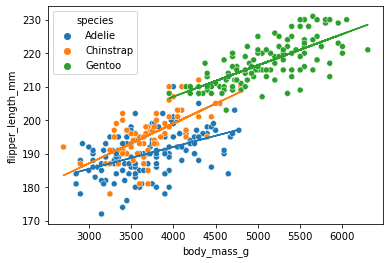

In [19]:
#Here is a simpler way using a for loop that would work for any number of species. 
#Create a nice scatter plot with seaborn
sns.scatterplot(data=penguins,x='body_mass_g',y='flipper_length_mm',hue='species')

#INitialize the linear model
linearModel = lm.LinearRegression()

#Loop over all the different species in pengions
for species_to_fit in penguins['species'].unique():

    #Select the subset of the pengions data that is only a single species
    #The 2 lines below do the same thing in 2 different ways
    #the "@" symbol means use the value in the species_to_fit variable
    #singleSpeciesFrame = penguins[penguins['species']==specie_to_fit]
    singleSpeciesFrame = penguins.query("species==@species_to_fit")

    #Fit a linear model to the single species data
    linearModel.fit( singleSpeciesFrame[['body_mass_g']], singleSpeciesFrame[['flipper_length_mm']] )

    #Create the values needed to plot a line of best fit. 
    x=singleSpeciesFrame[['body_mass_g']]
    yFit = linearModel.predict(x)
    plt.plot(x, yFit)
    

    

It's not clear what the best one to use for the new out of sample prediction.  The code below plots the estimates from the 3 different populatoins.  You can see how different they are.  

/Users/ales/opt/anaconda3/envs/jmaJupyterPy38/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ales/opt/anaconda3/envs/jmaJupyterPy38/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ales/opt/anaconda3/envs/jmaJupyterPy38/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


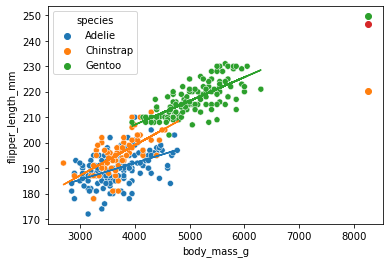

In [26]:
sns.scatterplot(data=penguins,x='body_mass_g',y='flipper_length_mm',hue='species')

#INitialize the linear model
linearModel = lm.LinearRegression()

#Loop over all the different species in pengions
for species_to_fit in penguins['species'].unique():

    #Select the subset of the pengions data that is only a single species
    #The 2 lines below do the same thing in 2 different ways
    #the "@" symbol means use the value in the species_to_fit variable
    #singleSpeciesFrame = penguins[penguins['species']==specie_to_fit]
    singleSpeciesFrame = penguins.query("species==@species_to_fit")

    #Fit a linear model to the single species data
    linearModel.fit( singleSpeciesFrame[['body_mass_g']], singleSpeciesFrame[['flipper_length_mm']] )

    #Create the values needed to plot a line of best fit. 
    x=singleSpeciesFrame[['body_mass_g']]

    yFit = linearModel.predict(x)
    plt.plot(x, yFit)

    yFit = linearModel.predict([[8250]])
    plt.scatter(8250, yFit)

 But the observed value is of 8,250 is closer to the Gentoo mass.  So it would be reasonable to use that data.  So lets get the predicition just fro the Gentoo penguins

In [17]:
singleSpeciesFrame = penguins[penguins['species']=='Gentoo']
linearModel.fit( singleSpeciesFrame[['body_mass_g']], singleSpeciesFrame[['flipper_length_mm']] )

#Making a dataframe here just to stay consisent
#Could also pass in an array
#Can't use a single number because it is not allowed. 
x = pd.DataFrame({'body_mass_g': [8250]})
yFit = linearModel.predict(x)
print(yFit) 

[[246.72985518]]


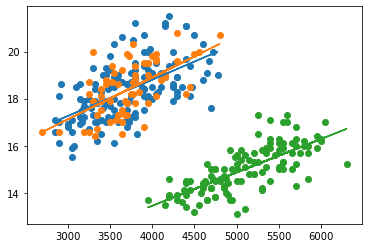

In [18]:
#Here's is similar to the flipper/body mass code above, but without using seaborn, 
#just matplotlib
#Notice the figure is not as nice and missing labels and legends. 
linearModel = lm.LinearRegression()

for species in penguins['species'].unique():
    
    singleSpeciesFrame = penguins[penguins['species']==species]
    linearModel.fit( singleSpeciesFrame[['body_mass_g']], singleSpeciesFrame[['culmen_depth_mm']] )

    x=singleSpeciesFrame[['body_mass_g']]
    y=singleSpeciesFrame[['culmen_depth_mm']]
    yFit = linearModel.predict(x)
    plt.scatter(x,y)
    plt.plot(x, yFit)


Here the slope is very similar but the offsets are different. Showing that heavier birds have deeper cullmens and the marginal relationship is the same, but Adelie and Chinstrap penguins have deeper cullmens than Gentoo penguins.  That is, given the same weight Adelie and Chinstrap will have the same size cullmen but deeper than a Gentoo penguin, and given the same weight change all 3 species will tend to have the same change in cullmen size. 